In [1]:
import matplotlib.pyplot as plt
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import rl_utils
import envlx_only
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
env = envlx_only.DroneEnv()

episode_return = 0
state = env.reset()
print(env.get_angle(),env.get_angle2goal())


0 -0.7853981633974483


C:\ProgramData\anaconda3\envs\UAV\lib\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


[-0.15989416394840372]
[0.4766796354246585]
[1.1214686219392114]
[1.7678649116935539]
[2.4084769127536676]
[3.0386577662283543]
[-2.6250024901035127]
[-2.0125342330878055]
[-1.401371642271183]
[-0.7853981633974492]
[-0.1598941639484046]
[0.4766796354246594]
[1.1214686219392114]
[1.7678649116935539]
[2.4084769127536667]
[3.0386577662283543]
[-2.625002490103512]
[-2.0125342330878055]
[-1.401371642271183]
[-0.7853981633974492]
[-0.1598941639484046]
[0.47667963542465586]
[1.1214686219392114]
[1.7678649116935539]
[2.4084769127536667]
[3.0386577662283543]
[-2.625002490103512]
[-2.0125342330878055]
[-1.401371642271183]
[-0.7853981633974492]
[-0.1598941639484046]
[0.4766796354246594]
[1.1214686219392114]
[1.7678649116935539]
[2.4084769127536667]
[3.0386577662283543]
[-2.625002490103512]
[-2.0125342330878055]
[-1.401371642271183]
[-0.7853981633974492]
[-0.1598941639484046]
[0.4766796354246594]
[1.1214686219392114]
[1.7678649116935539]
[2.4084769127536667]
[3.0386577662283543]
[-2.62500249010351

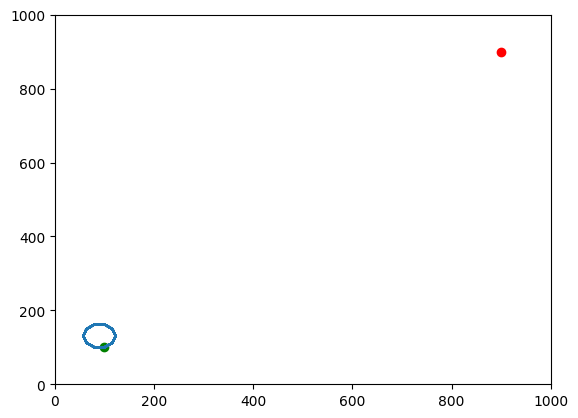

In [2]:

done = False
#绘制x,y轴
X=[]
Y=[]
count = 0
while not done:
    X.append(env.xy[0])
    Y.append(env.xy[1])
    count+=1
    action = 2 #np.random.randint(5)
    #print("航向角---转向---航向角\n")
    #print(env.heading,action,env.xy)
    next_state, reward, done = env.step(action)
    #print(env.get_angle(),env.get_angle2goal())
    #print(env.xy,env.heading)
    print(env.observation)
    state = next_state
    episode_return += reward
    #print(reward)
    if (count>300):
        done = True
#画图可视化
print(episode_return)
plt.plot(100, 100, 'go')  # 'ro'表示红色的点
plt.plot(900, 900, 'ro')  # 'ro'表示红色的点
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.plot(X,Y)
plt.show()

In [4]:

import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env.dummy_vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
import gym
import envlx_only
env = envlx_only.DroneEnv()
# 把环境向量化，如果有多个环境写成列表传入DummyVecEnv中，可以用一个线程来执行多个环境，提高训练效率
#env = DummyVecEnv([lambda : env])
# 定义一个DQN模型，设置其中的各个参数
model = DQN(
    "MlpPolicy",                                # MlpPolicy定义策略网络为MLP网络
    env=env, 
    learning_rate=5e-4,
    batch_size=128,
    buffer_size=50000,
    learning_starts=0,
    target_update_interval=250,
    policy_kwargs={"net_arch" : [256, 256]},     # 这里代表隐藏层为2层256个节点数的网络
    verbose=1,                                   # verbose=1代表打印训练信息，如果是0为不打印，2为打印调试信息
    tensorboard_log="./tensorboard/CartPole-v0/"  # 训练数据保存目录，可以用tensorboard查看
)
# 开始训练
model.learn(total_timesteps=1e5)
# 策略评估，可以看到倒立摆在平稳运行了
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, render=True)
#env.close()
print("mean_reward:",mean_reward,"std_reward:",std_reward)
# 保存模型到相应的目录
model.save("TrainedModel/Actor1.pkl")


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./tensorboard/CartPole-v0/DQN_25


C:\ProgramData\anaconda3\envs\UAV\lib\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.1     |
|    ep_rew_mean      | 256      |
|    exploration_rate | 0.979    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1043     |
|    time_elapsed     | 0        |
|    total_timesteps  | 225      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 20.8     |
|    n_updates        | 56       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.5     |
|    ep_rew_mean      | 974      |
|    exploration_rate | 0.947    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1093     |
|    time_elapsed     | 0        |
|    total_timesteps  | 559      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 16.2     |
|    n_updates      

In [5]:
model.save("C:/Users/10749/Desktop/my_UAV/DQN+UAV/V1/TrainedModel/Actor1.pkl")

In [ ]:
import matplotlib.pyplot as plt
# 在每个 episode 的开始调用一次 env.render()
state = env.reset()
env.render(mode='human')

for i in range(10):
    done = False
    r = 0
    while not done:
        env.render(mode='human')
        action, _states = model.predict(state, deterministic=True)
        print(state, action)
        next_state, reward, done, info = env.step(action)
        r += reward
        state = next_state
        print(r)

# 在每个 episode 结束后再调用一次 env.render()
    env.render(mode='human')
    plt.show()

[0.]
[-0.9986556] -1 [0.3470614] -28.68068396538183
[0.301193] -1 [0.301193] -30.649359658636968
[0.30312872] -1 [0.30312872] -31.797149705762422
[0.302222] -1 [0.302222] -31.130842714003393
[0.3020892] -1 [0.3020892] -29.257160713162193
[0.30270147] -1 [0.30270147] -27.899653437148572
[0.30350518] -1 [0.30350518] -28.305184862070746
[0.30376315] -1 [0.30376315] -30.098875397255142
[0.30323792] -1 [0.30323792] -31.63520852564352
[0.30240893] -1 [0.30240893] -31.503825602299003
[0.30203915] -1 [0.30203915] -29.82278357444784
[0.30247283] -1 [0.30247283] -28.13753105300566
[0.30331254] -1 [0.30331254] -27.997401084710873
[0.3037877] -1 [0.3037877] -29.52846685210443
[0.30346322] -1 [0.30346322] -31.325197921820745
[0.30263352] -1 [0.30263352] -31.739347675820227
[0.3020606] -1 [0.3020606] -30.38810574208037
[0.30227542] -1 [0.30227542] -28.512548617639823
[0.3030827] -1 [0.3030827] -27.837788808069945
[0.3037417] -1 [0.3037417] -28.981554292151486
[0.303648] -1 [0.303648] -30.89254475991

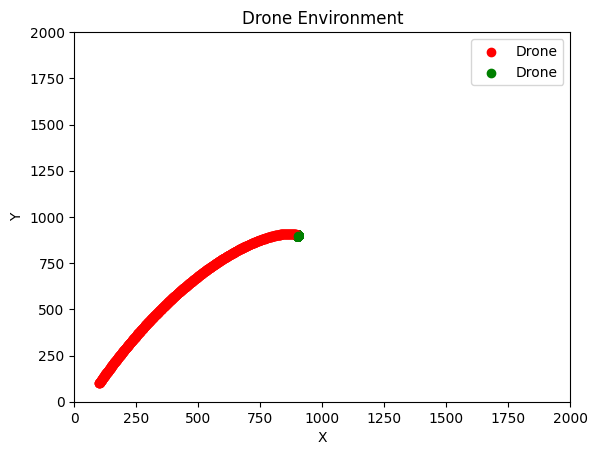

In [3]:
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3 import DDPG
from stable_baselines3.common.vec_env.dummy_vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
import gym
import env_v3_e
env = env_v3_e.DroneEnv()
# 在每个 episode 的开始调用一次 env.render()
state,_ = env.reset()
env.render(mode='human')


#model_p = DDPG.load("TrainedModel/Actor1.2.pkl")
model_e = DDPG.load("TrainedModel/Actor_e1.3.pkl")

done = False
r = 0
#plt.figure()
#plt.scatter(env.goal[0], env.goal[1], marker='x', color='green', label='Goal')
plt.xlim(env.space1.low[0], env.space1.high[0])
plt.ylim(env.space1.low[1], env.space1.high[1])
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Drone Environment')
print(state)
while not done:
    env.render(mode='human')
    #action_p, _states_p = model_p.predict(state, deterministic=True)
    action_e, _states_e = model_e.predict(state, deterministic=True)
    action_e = -1
    #print(action)
    next_state, reward, done, t,  info = env.step(action_e)
    r += reward
    print(state, action_e,next_state,reward)
    state = next_state
    
plt.show()

## 调试设备

In [1]:
import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.cuda.is_available())  #输出为True，则安装无误

2.1.2
11.8
True


In [3]:
import os
print(os.getcwd())
file_path = "train1.csv"
if not os.path.isfile(file_path):
    print(1)
    with open(file_path, 'w') as f:
        f.write('id,step,e_x,e_y\n')
else:
    print(2)

C:\Users\10749\Desktop\my_UAV\DQN+UAV\V1.4
2


## 测试预测模型的使用


In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Activation, Dropout
# 从 TensorFlow 中导入所需的模块
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import CSVLogger, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import transbigdata as tbd
import warnings
warnings.filterwarnings("ignore")
np.random.seed(120)
tf.random.set_seed(120)
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
def hav(theta):
    """
    计算给定角度（弧度制）的半正矢值。
    
    参数:
    theta: 角度，单位为弧度。
    
    返回:
    半正矢值。
    """
    s = np.sin(theta / 2)
    return s * s

def get_distance_hav(lat0, lng0, lat1, lng1):
    """
    根据经纬度使用haversine公式计算两点之间的地球表面距离。
    
    参数:
    lat0, lng0: 第一个点的纬度和经度。
    lat1, lng1: 第二个点的纬度和经度。
    
    返回:
    两点之间的距离（单位：公里）。
    """
    EARTH_RADIUS = 6371  # 地球半径（单位：公里）
    lat0 = np.radians(lat0)
    lat1 = np.radians(lat1)
    lng0 = np.radians(lng0)
    lng1 = np.radians(lng1)

    dlng = np.fabs(lng0 - lng1)
    dlat = np.fabs(lat0 - lat1)
    h = hav(dlat) + np.cos(lat0) * np.cos(lat1) * hav(dlng)
    distance = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(h))
    return distance
def createSequence(data, window=10, maxmin=None):
    """
    根据输入数据创建时间序列数据集。
    
    参数:
    data: 包含多个特征的DataFrame。
    window: 序列窗口大小。
    maxmin: 归一化时使用的最大最小值。
    
    返回:
    train_seq: 训练序列数据。
    train_label: 训练标签数据。
    """
    train_seq = []
    train_label = []
    m, n = maxmin
    for traj_id in set(data['id']):
        data_temp = data.loc[data.id == traj_id]
        data_temp = np.array(data_temp.loc[:, ['e_x', 'e_y']])
        data_temp = (data_temp - n) / (m - n)  # 归一化处理

        for i in range(data_temp.shape[0] - window):
            x = []
            #x存储10条数据
            for j in range(i, i + window):
                x.append(list(data_temp[j, :]))
            train_seq.append(x)
            train_label.append(data_temp[i + window, :])
            #train_seq每个元素是10条数据的数组
            #train_label每个元的是10条数据之后的数据
            #
    train_seq = np.array(train_seq, dtype='float64')
    train_label = np.array(train_label, dtype='float64')

    return train_seq, train_label

def FNormalizeMult(y_pre, y_true, max_min):
    """
    对预测结果和实际值进行多维反归一化处理，并计算预测点与实际点之间的距离。
    
    参数:
    y_pre: 预测结果。
    y_true: 实际值。
    max_min: 归一化时使用的最大最小值对。
    
    返回:
    y_pre: 反归一化后的预测结果。
    y_true: 反归一化后的实际值。
    """
    [m1, n1], [m2, n2] = max_min
    y_pre[:, 0] = y_pre[:, 0] * (m1 - m2) + m2
    y_pre[:, 1] = y_pre[:, 1] * (n1 - n2) + n2
    y_true[:, 0] = y_true[:, 0] * (m1 - m2) + m2
    y_true[:, 1] = y_true[:, 1] * (n1 - n2) + n2
    

    # 计算预测点与实际点之间的距离，并作为预测结果的一个维度，插入一个新的列
    y_pre = np.insert(y_pre, y_pre.shape[1],
                      get_distance_hav(y_true[:, 1], y_true[:, 0], y_pre[:, 1], y_pre[:, 0]), axis=1)

    return y_pre, y_true

In [3]:
train = pd.read_csv("./train.csv",index_col=0)
test = pd.read_csv("./test.csv",index_col=0)
train.head()

,id,step,e_x,e_y
0,0,1,900.000000,900.000000
0,1,1,900.000000,900.000000
0,1,2,903.873955,909.219136
0,1,3,911.776803,915.346533
0,1,4,915.530344,924.615348


In [4]:
import numpy as np

# 计算归一化参数
# 首先选取训练集中的特定列（'lon', 'lat', 'sog', 'cog'），这些通常是经度、纬度、速度等信息
nor = np.array(train.loc[:, ['e_x', 'e_y']])
# 计算每列的最大值，用于后续的归一化处理
m = nor.max(axis=0)
# 计算每列的最小值，用于后续的归一化处理
n = nor.min(axis=0)
# 将最大值和最小值组合成一个列表，后续在归一化和反归一化时使用
maxmin = [m, n]

# 设置时间窗口的大小，此处为10，意味着每个序列将包含连续的10个时间点的数据
windows = 10

# 使用createSequence函数创建训练数据的序列和标签
# train为训练数据集，windows为步长，maxmin为归一化的参数
#train_seq每个元素是10条数据的数组
#train_label每个元的是10条数据之后的数据
set(train['id'])
train_seq, train_label = createSequence(train, windows, maxmin)

# 使用相同的方式为测试数据集创建序列和标签
# test为测试数据集，windows和maxmin与训练数据集保持一致

test_seq, test_label = createSequence(test, windows, maxmin)

In [5]:
model = load_model("./model.h5")

In [ ]:
y_hat = model.predict(test_seq[i].reshape(1, windows, 2))

### 单步预测

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]
    id  step          e_x          e_y
0    7     1   900.000000   900.000000
0    7     2   903.873955   909.219136
0    7     3   911.691370   915.455162
0    7     4   915.200903   924.819092
0    7     5   923.058370   931.004575
..  ..   ...          ...          ...
0    7   107  1488.812771  1735.102728
0    7   108  1493.495067  1743.938796
0    7   109  1501.406807  1750.054708
0    7   110  1506.485953  1758.668783
0    7   111  1511.542790  1767.295972

[111 rows x 4 columns]
[[[0.         0.        ]
  [0.00384436 0.00838037]
  [0.01160204 0.01404904]
  ...
  [0.03751464 0.05089712]
  [0.0452597  0

ValueError: math domain error

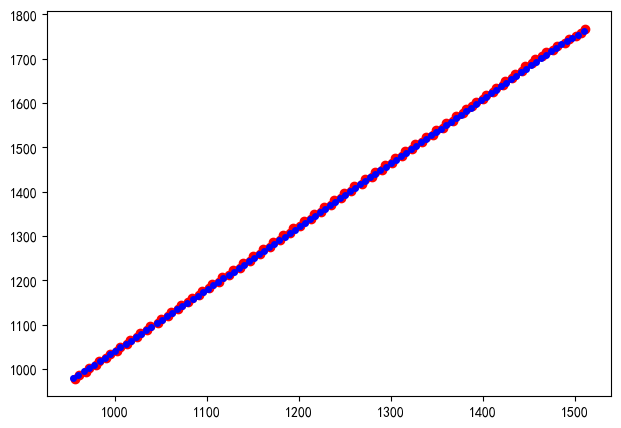

In [9]:
test_points_ids = list(set(test['id']))
print(test_points_ids)
for ids in test_points_ids[7:8]:
    y_pre = []
    print(test.loc[test.id == ids])
    #if(len(test.loc[test.id == ids]) < 30):
        #continue
    test_seq, test_label = createSequence(test.loc[test.id == ids], windows, maxmin)
    print(test_seq)
    y_true = test_label
    for i in range(len(test_seq)):
        print(type(test_seq[i].type))
        print("********************")
        print(test_seq[i].reshape(1, windows, 2))
        y_hat = model.predict(test_seq[i].reshape(1, windows, 2))
        print(y_hat)
        y_pre.append(y_hat[0])
    y_pre = np.array(y_pre, dtype='float64')
    print(y_pre)
    f_y_pre, f_y_true = FNormalizeMult(y_pre, y_true, maxmin)

    print(f"最大值: {max(f_y_pre[:, 2])}\n最小值: {min(f_y_pre[:, 2])}\n均值: {np.mean(f_y_pre[:, 2])}\n"
          f"方差: {np.var(f_y_pre[:, 2])}\n标准差: {np.std(f_y_pre[:, 2])}\n中位数: {np.median(f_y_pre[:, 2])}")

    # 画测试样本数据库
    plt.figure(figsize=(16, 5))
    plt.subplot(121)
    plt.plot(f_y_true[:, 0], f_y_true[:, 1], "ro", markersize=6,label='真实值')
    plt.plot(f_y_pre[:, 0], f_y_pre[:, 1], "bo",markersize=4, label='预测值')
    bounds = [min(f_y_true[:, 0])-0.02,min(f_y_true[:, 1])-0.01,max(f_y_true[:, 0])+0.02,max(f_y_true[:, 1])+0.01]
    tbd.plot_map(plt,bounds,zoom = 16,style = 3)
    plt.legend(fontsize=14)
    plt.grid()
    plt.xlabel("经度",fontsize=14)
    plt.ylabel("纬度",fontsize=14)
    plt.title("id:",fontsize=17)

    meanss = np.mean(f_y_pre[:, 2])
    plt.subplot(122)
    plt.bar(range(f_y_pre.shape[0]),f_y_pre[:, 2],label='误差')
    plt.plot([0,f_y_pre.shape[0]],[meanss,meanss],'--r',label="均值")
    plt.title("预测值和真实值的误差",fontsize=17)
    plt.xlabel("船舶轨迹点",fontsize=14)
    plt.ylabel("预测误差(KM)",fontsize=14)
    plt.text(f_y_pre.shape[0]*1.01,meanss*0.96,round(meanss,4),fontsize=14,color='r')
    plt.grid()
    plt.legend(fontsize=14)

201


Text(0.5, 1.0, 'Drone Path')

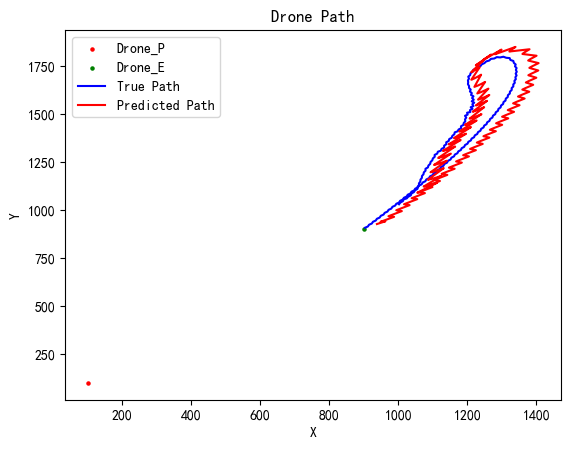

In [3]:
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3 import DDPG
from stable_baselines3.common.vec_env.dummy_vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
import gym
import env_v3_P_TP
env = env_v3_P_TP.DroneEnv()
# 在每个 episode 的开始调用一次 env.render()
x=[]
model_p = DDPG.load("TrainedModel/Actor_p1.4.pkl")
for i in range(1):
    # 存储真实位置和预测位置的列表
    x_true_list = []
    y_true_list = []
    x_pre_list = []
    y_pre_list = []

    state,_ = env.reset()
    env.render(mode='human')


    #model_p = DDPG.load("TrainedModel/Actor1.2.pkl")


    done = False
    r = 0
    #plt.figure()
    #plt.scatter(env.goal[0], env.goal[1], marker='x', color='green', label='Goal')
    '''plt.xlim(env.space1.low[0], env.space1.high[0])
    plt.ylim(env.space1.low[1], env.space1.high[1])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Drone Environment')'''
    #print(state)
    t1 = 0
    while not done:
        t1 += 1
        #env.render(mode='human')
        #action_p, _states_p = model_p.predict(state, deterministic=True)
        action_p, _states_e = model_p.predict(state, deterministic=True)
        #action_e = 0
        #print(action)
        #print(state, action_e)
        next_state, reward, done, t,  info = env.step(action_p)
        # 存储真实位置和预测位置
        x_true_list.append(env.data_true[-1][0])
        y_true_list.append(env.data_true[-1][1])
        x_pre_list.append(env.data_pre[-1][0])
        y_pre_list.append(env.data_pre[-1][1])
        r += reward
        state = next_state
        #print(r)
    print(t1)
    x.append(t1)
# 绘制路径
plt.plot(x_true_list, y_true_list, label='True Path', color='blue')
plt.plot(x_pre_list, y_pre_list, label='Predicted Path', color='red')
# 添加标签和标题
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Drone Path')